# For Issue 1279
---
Identify addresses or small areas that could benefit from more signage, increased community assistance, or other actions

# Table of Contents
---
### [Package Imports](#Imports-and-Formatting)
### [API & Data Imports](#LA-311-Raw-Data-Imports)
### [Data Cleaning](#Cleaning)
### [Exploratory Data Analysis](#Explore)
> #### [All Requests in Dataset](#All-Requests)

> #### [Addresses w/ >= 2 Requests in Dataset](#>=2-Requests)

> #### [Addresses w/ >= 5 Requests in Dataset](#>=5-Requests)

# Imports and Formatting
-----

In [1]:
import pandas as pd
from pandas import json_normalize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter("ignore")
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

# LA 311 Raw Data Imports
-----
[API Source](https://data.lacity.org/City-Infrastructure-Service-Requests/MyLA311-Service-Request-Data-2022/i5ke-k6by) | [Documentation](https://dev.socrata.com/foundry/data.lacity.org/i5ke-k6by)

In [2]:
# preserving code for just in case; API pull for most recent 1000 311 requests
'''
url = "https://data.lacity.org/resource/i5ke-k6by.json"
req = requests.get(url)
print(f'Status: {req.status_code}')

json_311 = req.json()
df_311_1000 = json_normalize(json_311)
'''

'\nurl = "https://data.lacity.org/resource/i5ke-k6by.json"\nreq = requests.get(url)\nprint(f\'Status: {req.status_code}\')\n\njson_311 = req.json()\ndf_311_1000 = json_normalize(json_311)\n'

In [3]:
# CMD LINE: python get_311_request_data_csv.py "2021-09-23" "2022-09-23"
df_311_raw = pd.read_csv('./data/21Sept23_22Sept23_api.csv')
df_311 = df_311_raw.copy()

In [4]:
df_311.head()

,Unnamed: 0,requestId,srnumber,councilId,councilName,typeId,typeName,agencyId,agencyName,sourceId,sourceName,createdDate,closedDate,address,latitude,longitude
0,0,10638529,1-2500995771,66,Panorama City,6,Illegal Dumping,3,Sanitation Bureau,8,Phone Call,2022-09-19T11:07:12,NaN,"8209 N KESTER AVE, 91402",34.219906,-118.457635
1,1,10638532,1-2500995851,11,Chatsworth,4,Bulky Items,3,Sanitation Bureau,8,Phone Call,2022-09-19T11:07:22,2022-09-20T09:35:20,"11225 N SIERRA PASS PL, 91311",34.274721,-118.610043
2,2,10638534,1-2500998901,39,Historic Highland Park,7,Metal/Appliances,3,Sanitation Bureau,17,Website,2022-09-19T11:07:35,2022-09-20T10:11:11,"243 S AVENUE 50, 90042",34.102958,-118.200271
3,3,10638536,1-2500997561,59,Northridge South,4,Bulky Items,3,Sanitation Bureau,17,Website,2022-09-19T11:07:42,2022-09-21T07:34:01,"17162 W PARTHENIA ST, 91325",34.228377,-118.508081
4,4,10638537,1-2500999011,93,Westside,7,Metal/Appliances,3,Sanitation Bureau,8,Phone Call,2022-09-19T11:07:53,2022-09-21T12:05:30,"1833 S MANNING AVE, 90025",34.051436,-118.430501


# Cleaning
---

## Arrange Columns

In [5]:
# API pull for most recent 1000 311 requests
'''
df_311_1000 = df_311_1000[['servicedate', 'requesttype', 'latitude', 'longitude',  
                'address', 'zipcode', 'nc', 'ncname', 'requestsource', 'assignto', 'owner',
                'cd', 'cdmember', 'apc', 'status']]
'''

"\ndf_311_1000 = df_311_1000[['servicedate', 'requesttype', 'latitude', 'longitude',  \n                'address', 'zipcode', 'nc', 'ncname', 'requestsource', 'assignto', 'owner',\n                'cd', 'cdmember', 'apc', 'status']]\n"

In [6]:
print(df_311.shape)
# df_311.head()

(20000, 16)


In [7]:
df_311.columns

Index(['Unnamed: 0', 'requestId', 'srnumber', 'councilId', 'councilName',
       'typeId', 'typeName', 'agencyId', 'agencyName', 'sourceId',
       'sourceName', 'createdDate', 'closedDate', 'address', 'latitude',
       'longitude'],
      dtype='object')

In [8]:
df_311 = df_311[['requestId', 'createdDate', 'closedDate', 'typeId', 'typeName', 'address', 'latitude',
       'longitude', 'agencyId', 'agencyName', 'sourceId', 'srnumber', 'sourceName', 'councilId', 'councilName']]

## Check/Handle Nulls

In [9]:
(df_311.isnull().sum().sum())/len(df_311)

0.36585

In [10]:
df_311.dropna(inplace = True)

## Check/Handle Data Types

In [11]:
df_311.dtypes

requestId        int64
createdDate     object
closedDate      object
typeId           int64
typeName        object
address         object
latitude       float64
longitude      float64
agencyId         int64
agencyName      object
sourceId         int64
srnumber        object
sourceName      object
councilId        int64
councilName     object
dtype: object

In [12]:
# Dates to datetime
df_311['createdDate'] = pd.to_datetime(df_311['createdDate'])
df_311['closedDate'] = pd.to_datetime(df_311['closedDate'])

# councilID to object
df_311['councilID'] = df_311['councilId'].apply(lambda x: int(x))

# zip lat/lon
df_311['lat_lon'] = [(lat, lon) for lat, lon in zip(df_311['latitude'], df_311['longitude'])]
df_311 = df_311[['requestId', 'createdDate', 'closedDate', 'typeId', 'typeName', 'address', 'lat_lon', 'latitude',
       'longitude', 'agencyId', 'agencyName', 'sourceId', 'srnumber', 'sourceName', 'councilId', 'councilName']]

In [13]:
df_311.dtypes

requestId               int64
createdDate    datetime64[ns]
closedDate     datetime64[ns]
typeId                  int64
typeName               object
address                object
lat_lon                object
latitude              float64
longitude             float64
agencyId                int64
agencyName             object
sourceId                int64
srnumber               object
sourceName             object
councilId               int64
councilName            object
dtype: object

In [14]:
print(df_311.shape)
df_311.head()

(12683, 16)


,requestId,createdDate,closedDate,typeId,typeName,address,lat_lon,latitude,longitude,agencyId,agencyName,sourceId,srnumber,sourceName,councilId,councilName
1,10638532,2022-09-19 11:07:22,2022-09-20 09:35:20,4,Bulky Items,"11225 N SIERRA PASS PL, 91311","(34.2747211947, -118.610043043)",34.274721,-118.610043,3,Sanitation Bureau,8,1-2500995851,Phone Call,11,Chatsworth
2,10638534,2022-09-19 11:07:35,2022-09-20 10:11:11,7,Metal/Appliances,"243 S AVENUE 50, 90042","(34.1029581842, -118.200271159)",34.102958,-118.200271,3,Sanitation Bureau,17,1-2500998901,Website,39,Historic Highland Park
3,10638536,2022-09-19 11:07:42,2022-09-21 07:34:01,4,Bulky Items,"17162 W PARTHENIA ST, 91325","(34.2283765872, -118.508080576)",34.228377,-118.508081,3,Sanitation Bureau,17,1-2500997561,Website,59,Northridge South
4,10638537,2022-09-19 11:07:53,2022-09-21 12:05:30,7,Metal/Appliances,"1833 S MANNING AVE, 90025","(34.0514359143, -118.430501451)",34.051436,-118.430501,3,Sanitation Bureau,8,1-2500999011,Phone Call,93,Westside
5,10638538,2022-09-19 11:07:54,2022-09-20 10:19:24,1,Graffiti,"17308 W SATICOY ST, 91406","(34.2082575227, -118.510410902)",34.208258,-118.510411,4,Office of Community Beautification,17,1-2500997651,Website,44,Lake Balboa


In [15]:
# df_311.to_csv('./data/clean_21Sept23_22Sept23_api.csv', index = False)

# Explore
---

## All Requests

In [16]:
df_311.describe(include = 'all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
requestId,12683.0,NaN,NaN,NaN,NaT,NaT,10656337.244264,12316.786462,10636593.0,10645265.0,10654055.0,10665227.0,10685999.0
createdDate,12683,10060,2022-09-20 16:15:45,9,2022-09-19 11:07:22,2022-09-23 16:41:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
closedDate,12683,12385,2022-09-21 08:25:15,3,2022-09-19 11:15:15,2022-09-23 18:55:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
typeId,12683.0,NaN,NaN,NaN,NaT,NaT,3.545297,2.172079,1.0,1.0,4.0,4.0,12.0
typeName,12683,12,Bulky Items,5771,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,12683,9849,"1900 E 6TH ST, 90033",27,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat_lon,12683,9909,"(34.0400547647, -118.21986824)",27,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,12683.0,NaN,NaN,NaN,NaT,NaT,34.075627,0.123428,33.706284,34.015985,34.067918,34.179549,34.325753
longitude,12683.0,NaN,NaN,NaN,NaT,NaT,-118.353566,0.109341,-118.662958,-118.434264,-118.310853,-118.270842,-118.157741
agencyId,12683.0,NaN,NaN,NaN,NaT,NaT,3.357171,0.559925,1.0,3.0,3.0,4.0,7.0


In [17]:
# count of requests by type and neighborhood council
type_nc_ct = df_311.groupby(['typeName', 'councilName'])['requestId'].agg('count').reset_index(name = 'request_count')
type_nc_ct.sort_values(by = 'request_count', ascending = False).head(20)

,typeName,councilName,request_count
272,Graffiti,Boyle Heights,424
336,Graffiti,South Central,306
280,Graffiti,Downtown Los Angeles,245
166,Bulky Items,Van Nuys,202
107,Bulky Items,Empowerment Congress Southeast,193
357,Graffiti,Zapata King,160
282,Graffiti,East Hollywood,154
179,Bulky Items,Wilshire Center - Koreatown,150
147,Bulky Items,Pacoima,149
149,Bulky Items,Panorama City,148


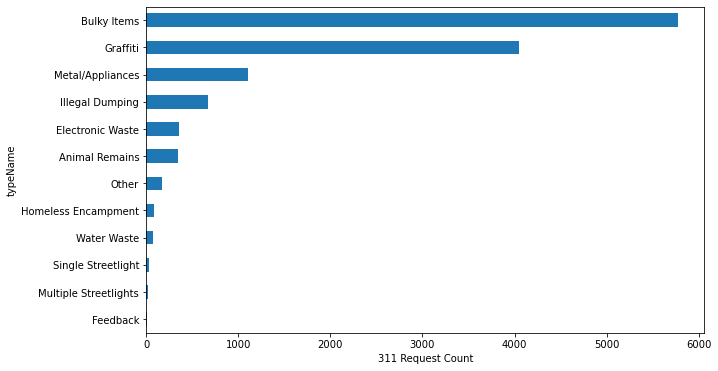

In [18]:
# Bar chart for type of request counts for all requests
plt.figure(figsize = (10,6))
df_311['typeName'].value_counts().sort_values(ascending = True).plot(kind = 'barh')
plt.ylabel('typeName')
plt.xlabel('311 Request Count')
plt.plot();

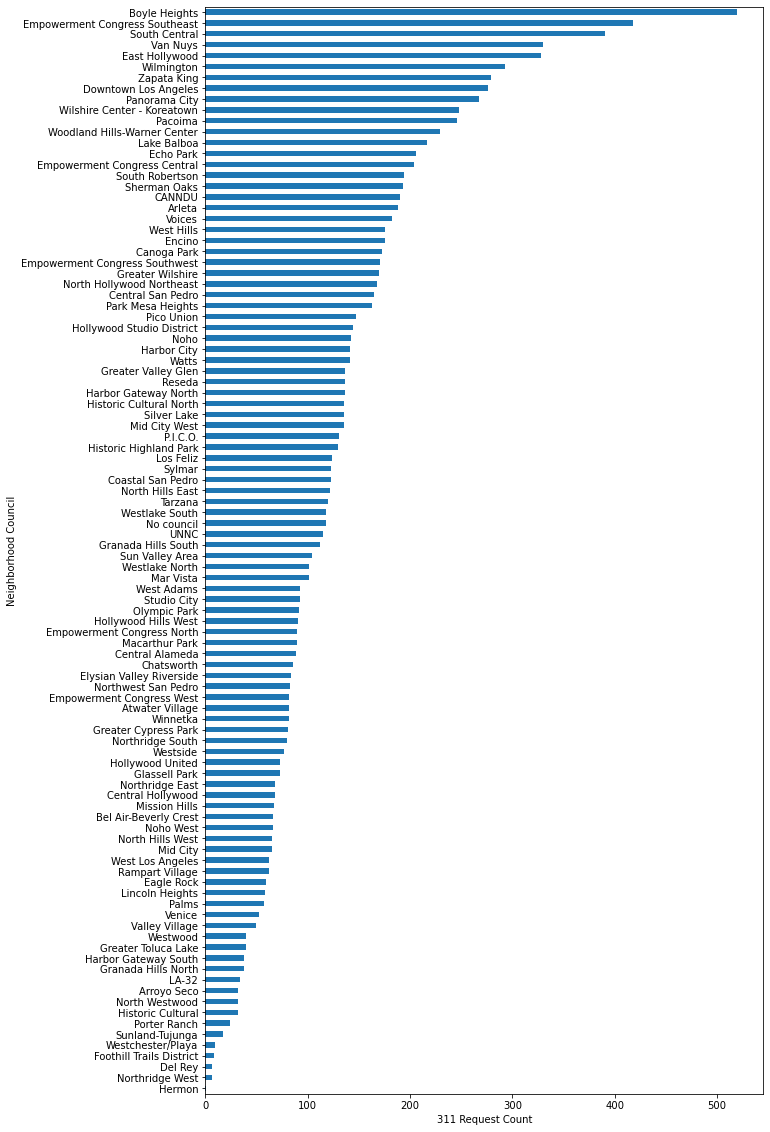

In [19]:
# Bar chart for type of request counts for all requests
plt.figure(figsize = (10,20))
df_311['councilName'].value_counts().sort_values(ascending = True).plot(kind = 'barh')
plt.ylabel('Neighborhood Council')
plt.xlabel('311 Request Count')
plt.plot();

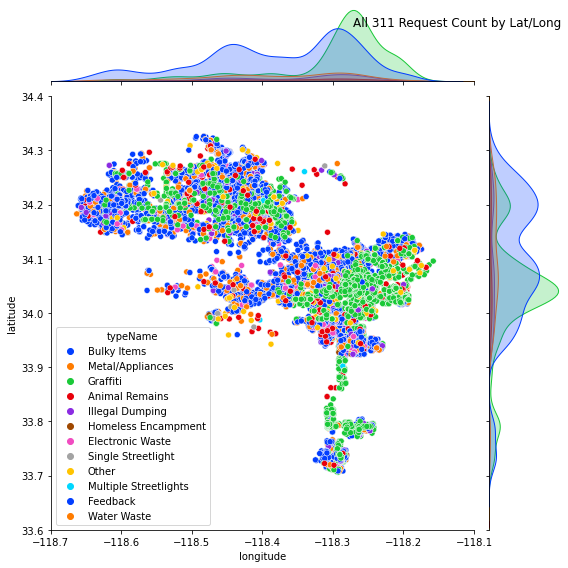

In [20]:
# type by location
sns.jointplot(x = df_311['longitude'], y = df_311['latitude'], hue = df_311['typeName'], 
              kind='scatter', color = 'green', height = 8, palette = 'bright', 
              xlim = (-118.7, -118.1), ylim = (33.6, 34.4)
             )
plt.title('All 311 Request Count by Lat/Long', pad = 70, loc = 'right')
plt.show();

## >=2 Requests

In [21]:
by_address = df_311.groupby(['typeName', 'latitude', 'longitude', 'councilId', 
                             'councilName'])['address'].value_counts().sort_values(ascending = False).reset_index(name='count')
grt_eq_2_ct = by_address[by_address['count'] >= 2]
print(grt_eq_2_ct.size)
grt_eq_2_ct.head()

9191


,typeName,latitude,longitude,councilId,councilName,address,count
0,Graffiti,34.040055,-118.219868,5,Boyle Heights,"1900 E 6TH ST, 90033",27
1,Graffiti,34.040224,-118.219759,5,Boyle Heights,"1901 E 6TH ST, 90033",26
2,Graffiti,34.031713,-118.198213,5,Boyle Heights,"524 S LORENA ST, 90063",9
3,Graffiti,34.044474,-118.238282,37,Historic Cultural,"333 S ALAMEDA ST, 90013",9
4,Graffiti,34.007843,-118.278578,99,Zapata King,"4163 S BROADWAY, 90037",8


In [22]:
grt_eq_2_ct.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
typeName,1313,10,Graffiti,622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,1313.0,NaN,NaN,NaN,34.061974,0.121544,33.70764,34.012461,34.050964,34.146676,34.325753
longitude,1313.0,NaN,NaN,NaN,-118.330208,0.103167,-118.657001,-118.405276,-118.29023,-118.260733,-118.167782
councilId,1313.0,NaN,NaN,NaN,49.3115,31.477315,0.0,18.0,51.0,75.0,99.0
councilName,1313,96,South Central,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,1313,1300,"666 W 61ST ST, 90044",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,1313.0,NaN,NaN,NaN,2.318355,1.205592,2.0,2.0,2.0,2.0,27.0


In [23]:
# https://stackoverflow.com/questions/32918506/pandas-how-to-filter-dataframe-for-duplicate-items-that-occur-at-least-n-times
grt_eq_2_df = df_311[df_311['address'].isin(df_311['address'].value_counts()[df_311['address'].value_counts()>=2].index)]

In [24]:
# count of requests by type and neighborhood council for addresses with >= 2 requests
grt_eq_2_type_nc_ct = grt_eq_2_df.groupby(['typeName', 'councilName'])['requestId'].agg('count').reset_index(name = 'request_count')
grt_eq_2_type_nc_ct.sort_values(by = 'request_count', ascending = False).head(20)

,typeName,councilName,request_count
193,Graffiti,Boyle Heights,253
243,Graffiti,South Central,223
200,Graffiti,Downtown Los Angeles,143
259,Graffiti,Zapata King,101
202,Graffiti,East Hollywood,79
91,Bulky Items,Panorama City,75
89,Bulky Items,Pacoima,75
49,Bulky Items,Empowerment Congress Southeast,75
255,Graffiti,Westlake South,59
118,Bulky Items,Wilshire Center - Koreatown,59


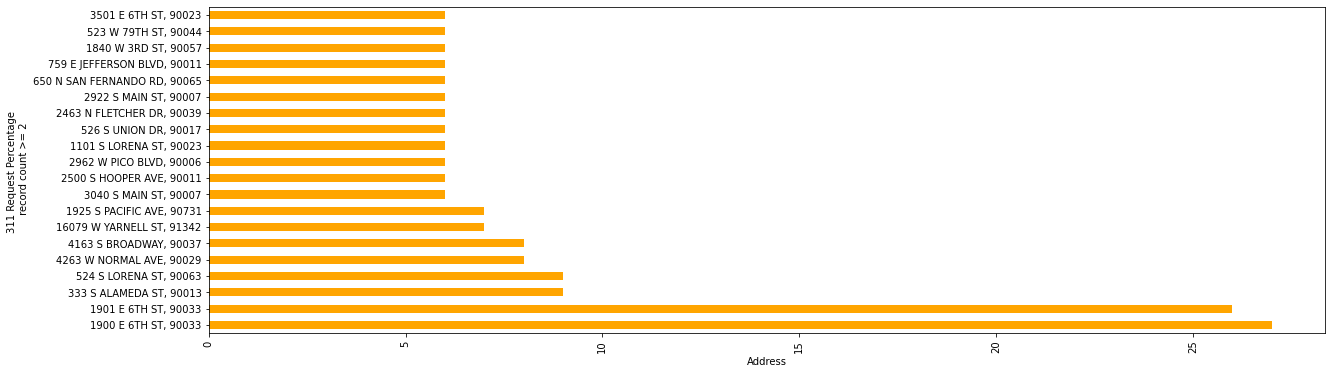

In [25]:
# Addresses with >=2 requests
plt.figure(figsize = (20,6))
grt_eq_2_df['address'].value_counts().sort_values(ascending = False).head(20).plot(kind = 'barh', color = 'orange')
plt.xlabel('Address')
plt.ylabel('311 Request Percentage \n record count >= 2')
plt.xticks(rotation=90);

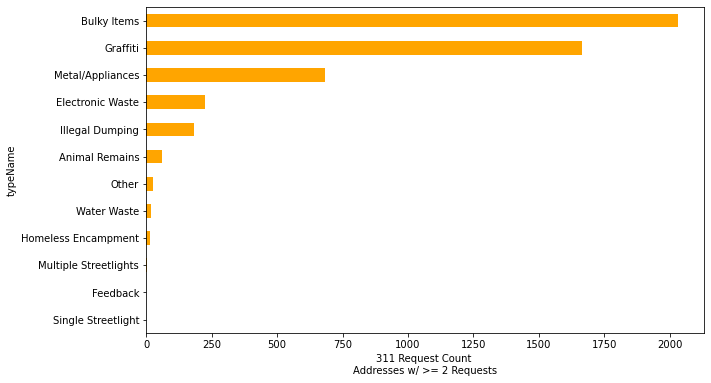

In [26]:
# Bar chart types of requests for address with >=2 requests
plt.figure(figsize = (10,6))
grt_eq_2_df['typeName'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'orange')
plt.ylabel('typeName')
plt.xlabel('311 Request Count \nAddresses w/ >= 2 Requests')
plt.plot();

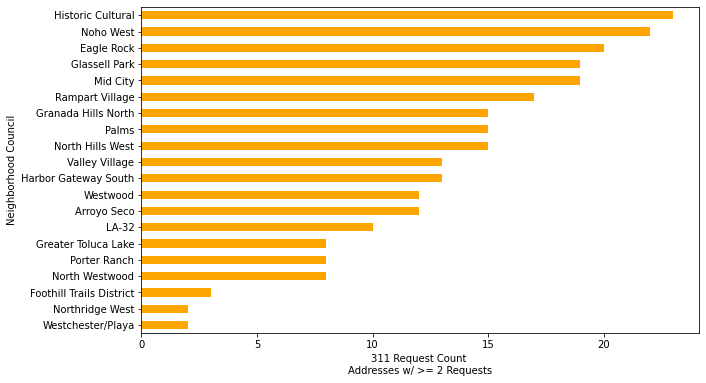

In [27]:
# Bar chart councilName for Neighborhood Councils with >=2 requests; top 20
plt.figure(figsize = (10,6))
grt_eq_2_df['councilName'].value_counts().sort_values(ascending = True).head(20).plot(kind = 'barh', color = 'orange')
plt.ylabel('Neighborhood Council')
plt.xlabel('311 Request Count \nAddresses w/ >= 2 Requests')
plt.plot();

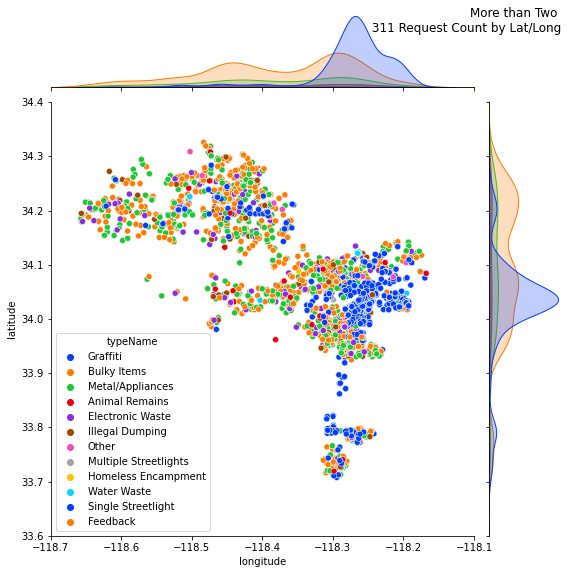

In [28]:
# Address with >=2 requests
sns.jointplot(x = grt_eq_2_df['longitude'], y = grt_eq_2_df['latitude'], hue = grt_eq_2_df['typeName'],
              kind='scatter', height = 8, palette = 'bright', 
              xlim = (-118.7, -118.1), ylim = (33.6, 34.4)
             )
plt.title('More than Two \n 311 Request Count by Lat/Long', pad = 70, loc = 'right')
plt.show();

## >=5 Requests

In [29]:
by_address = df_311.groupby(['typeName', 'latitude', 'longitude', 'councilId', 'councilName'])['address'].value_counts().sort_values(ascending = False).reset_index(name='count')
grt_eq_5_ct = by_address[by_address['count'] >= 5]

In [30]:
grt_eq_5_ct.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
typeName,29,1,Graffiti,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,29.0,NaN,NaN,NaN,34.020634,0.071267,33.726193,34.017158,34.029727,34.050169,34.107133
longitude,29.0,NaN,NaN,NaN,-118.259624,0.029437,-118.305145,-118.281826,-118.267448,-118.249489,-118.196155
councilId,29.0,NaN,NaN,NaN,52.172414,35.419999,3.0,16.0,68.0,74.0,99.0
councilName,29,13,South Central,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,29,29,"1900 E 6TH ST, 90033",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,29.0,NaN,NaN,NaN,7.448276,5.402289,5.0,5.0,6.0,6.0,27.0


In [31]:
# https://stackoverflow.com/questions/32918506/pandas-how-to-filter-dataframe-for-duplicate-items-that-occur-at-least-n-times
grt_eq_5_df = df_311[df_311['address'].isin(df_311['address'].value_counts()[df_311['address'].value_counts()>=5].index)]

In [32]:
# count of requests by type and neighborhood council for addresses with >= 5 requests
grt_eq_5_type_nc_ct = grt_eq_5_df.groupby(['typeName', 'councilName'])['requestId'].agg('count').reset_index(name = 'request_count')
grt_eq_5_type_nc_ct.sort_values(by = 'request_count', ascending = False).head(20)

,typeName,councilName,request_count
21,Graffiti,Boyle Heights,74
29,Graffiti,South Central,39
34,Graffiti,Zapata King,22
23,Graffiti,East Hollywood,16
28,Graffiti,Pico Union,11
33,Graffiti,Westlake South,11
25,Graffiti,Harbor Gateway North,10
26,Graffiti,Historic Cultural,9
22,Graffiti,Coastal San Pedro,7
13,Bulky Items,Sylmar,7


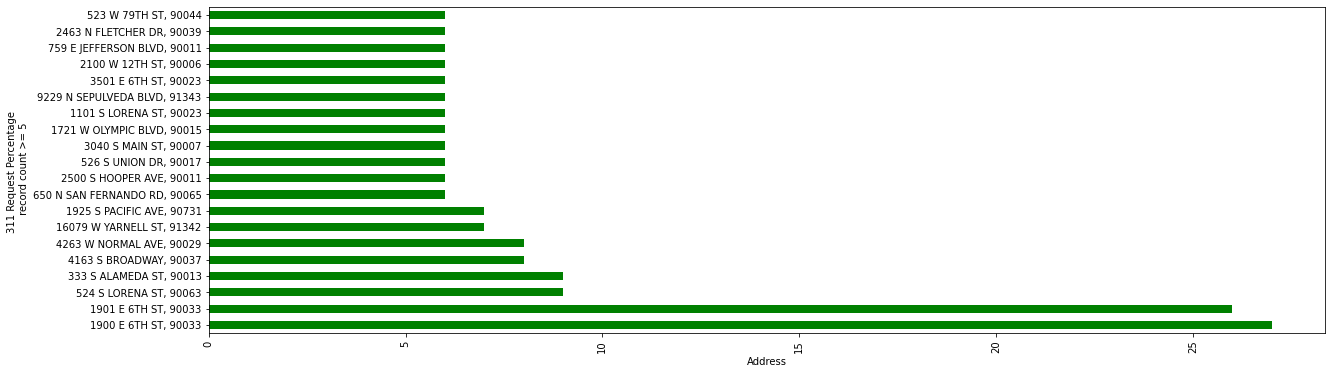

In [33]:
# Addresses with >=5 requests; top 20
plt.figure(figsize = (20,6))
grt_eq_5_df['address'].value_counts().sort_values(ascending = False).head(20).plot(kind = 'barh', color = 'green')
plt.xlabel('Address')
plt.ylabel('311 Request Percentage \n record count >= 5')
plt.xticks(rotation=90);

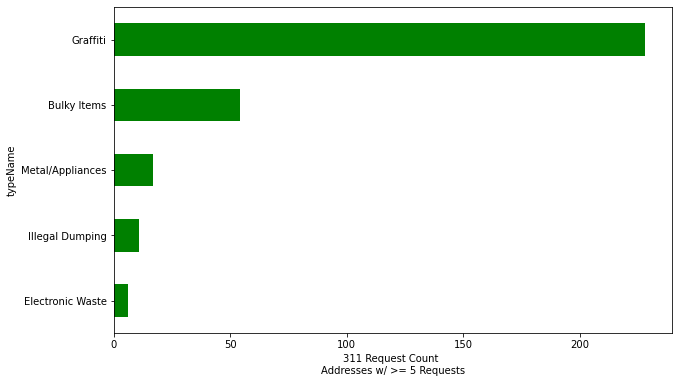

In [34]:
# Bar chart types of requests for address with >=5 requests
plt.figure(figsize = (10,6))
grt_eq_5_df['typeName'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'green')
plt.ylabel('typeName')
plt.xlabel('311 Request Count \nAddresses w/ >= 5 Requests')
plt.plot();

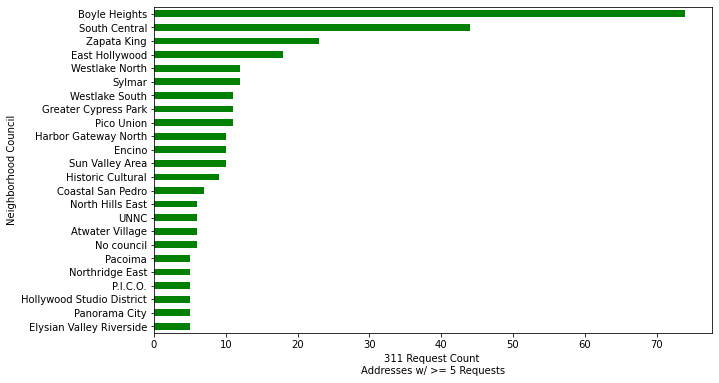

In [35]:
# Bar chart councilName for Neighborhood Councils with >=5 requests
plt.figure(figsize = (10,6))
grt_eq_5_df['councilName'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'green')
plt.ylabel('Neighborhood Council')
plt.xlabel('311 Request Count \nAddresses w/ >= 5 Requests')
plt.plot();

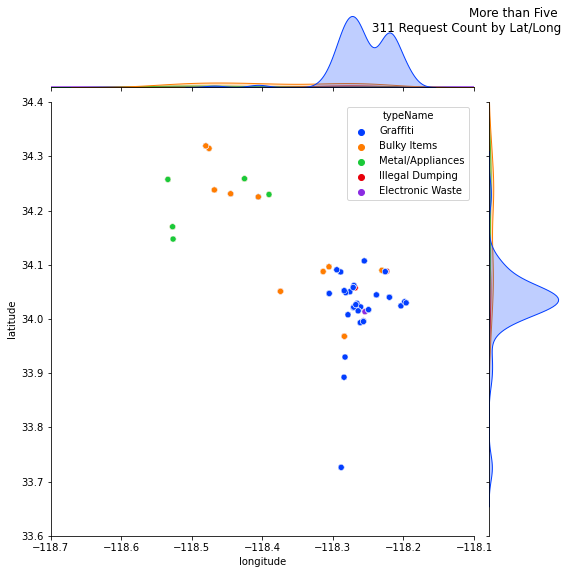

In [36]:
# Address with more than 5 requests
sns.jointplot(x = grt_eq_5_df['longitude'], y = grt_eq_5_df['latitude'], hue = grt_eq_5_df['typeName'],
              kind='scatter', height = 8, palette = 'bright', 
              xlim = (-118.7, -118.1), ylim = (33.6, 34.4)
             )
plt.title('More than Five \n 311 Request Count by Lat/Long', pad = 70, loc = 'right')
plt.show();